### 불러오기

In [92]:
import numpy as np
import pandas as pd

In [93]:
data = pd.read_csv('tohj.csv')

### 데이터 전처리

In [94]:
raw_data = data.copy()

In [95]:
df = raw_data[["YM", "average_temp", "평균난방공급량(m3)"]].rename(columns={'YM': 'ym', 'average_temp' : 'temp_m', '평균난방공급량(m3)': 'gas_m'})


In [97]:
df['ym'] = pd.to_datetime(df['ym'])

In [98]:
temp = pd.read_csv('temp.csv')
temp['Date'] =pd.to_datetime(temp['Date'])

### EDA

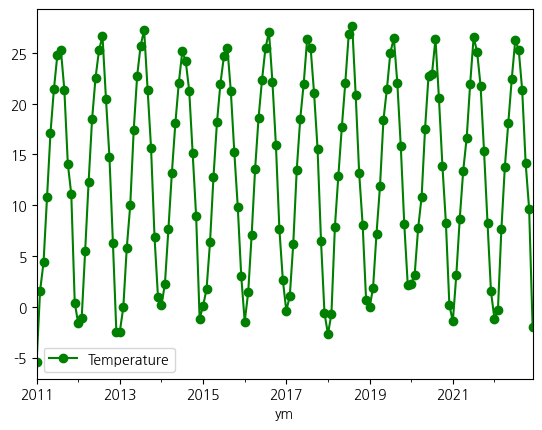

In [99]:
import matplotlib.pyplot as plt

df.plot(x='ym', y='temp_m', marker='o', color='g', label='Temperature')
plt.show()

<AxesSubplot: xlabel='ym'>

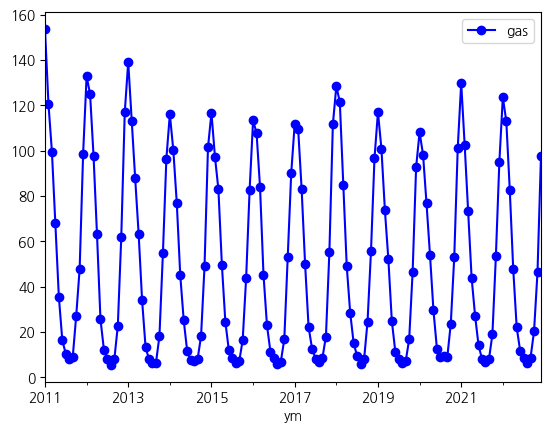

In [100]:
df.plot(x='ym', y='gas_m',  marker='o', color='b', label='gas')

<AxesSubplot: xlabel='Date'>

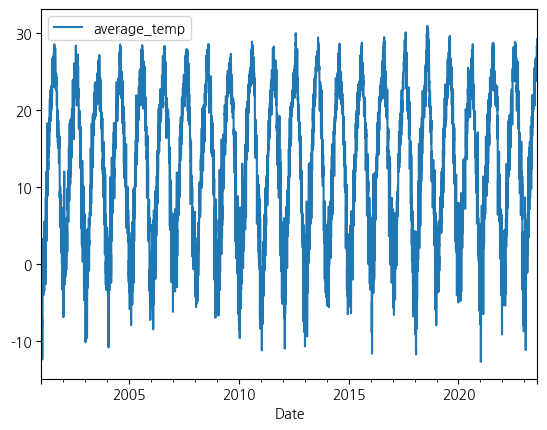

In [57]:
temp.plot(x = 'Date', y = 'average_temp')

In [58]:
import calendar

def count_weekdays(year, month):
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    count_days = [0] * 7
    
    for day in range(1, calendar.monthrange(year, month)[1] + 1):
        day_of_week = calendar.weekday(year, month, day)
        count_days[day_of_week] += 1

    return dict(zip(weekdays, count_days))

print(count_weekdays(2011, 1))
print(count_weekdays(2012, 1))

{'Monday': 5, 'Tuesday': 4, 'Wednesday': 4, 'Thursday': 4, 'Friday': 4, 'Saturday': 5, 'Sunday': 5}
{'Monday': 5, 'Tuesday': 5, 'Wednesday': 4, 'Thursday': 4, 'Friday': 4, 'Saturday': 4, 'Sunday': 5}


### 차분해보기

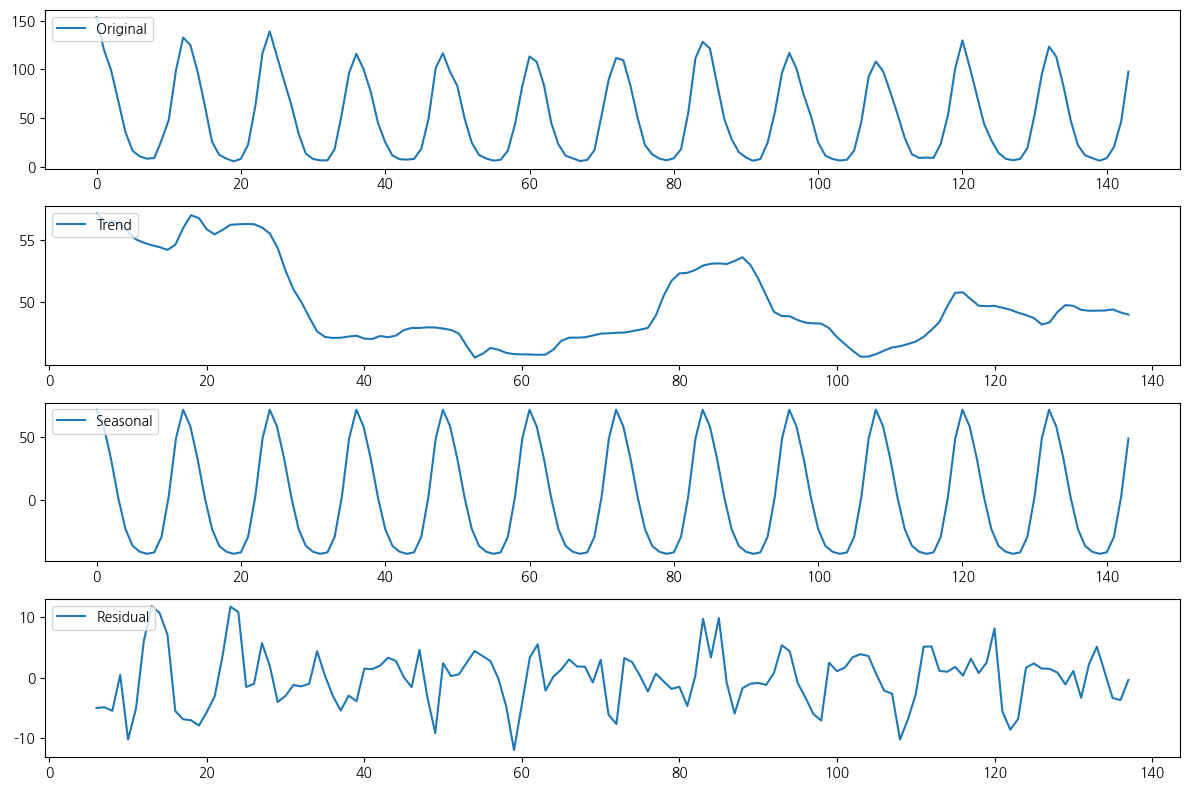

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['gas_m'], model='additive', period=12)  # Use 'multiplicative' model if needed and set correct period
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['gas_m'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()









In [108]:
# Add weekday information
df['weekday'] = df['ym'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate weekday averages
weekday_avg = df.groupby('weekday')['gas_m'].transform('mean')

# Remove weekday effect
df['gas_m_deweekday'] = df['gas_m'] - weekday_avg

print(df)

            ym     temp_m       gas_m  weekday  gas_m_deweekday
0   2011-01-01  -5.427461  153.763231        5       102.661528
1   2011-02-01   1.561250  120.834840        1        63.224564
2   2011-03-01   4.367996   99.605927        1        41.995651
3   2011-04-01  10.823707   67.980919        4        16.240995
4   2011-05-01  17.100126   35.638205        6       -14.310302
..         ...        ...         ...      ...              ...
139 2022-08-01  25.306725    6.180494        0       -37.070201
140 2022-09-01  21.327563    8.777335        3       -40.932595
141 2022-10-01  14.120664   20.379621        5       -30.722083
142 2022-11-01   9.643482   46.486945        1       -11.123331
143 2022-12-01  -1.964850   97.736559        3        48.026629

[144 rows x 5 columns]


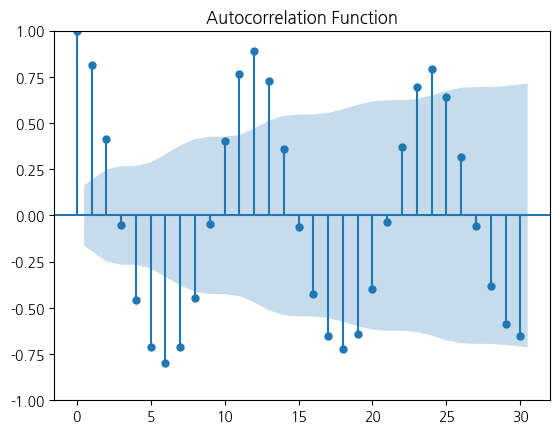

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['gas_m'], lags=30)
plt.title('Autocorrelation Function')
plt.show()